In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_df = pd.read_csv('Bias_correction_ucl.csv', index_col = "Date", parse_dates= True)

In [ ]:
data_df.shape

(7752, 24)

In [ ]:
data_df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
#Splititng the Date into Year, Month and Day
data_df.reset_index(inplace=True)
data_df['Year']  = data_df['Date'].dt.year
data_df['Month'] = data_df['Date'].dt.month
data_df['Day']   = data_df['Date'].dt.day
data_df.set_index('Date', inplace=True)

In [ ]:
print('Getting the info: ')
print(data_df.info())

Getting the info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4  

In [ ]:
data_df.drop(data_df.tail(2).index, inplace=True)
index_present_tmax= data_df['Present_Tmax'].index[data_df['Present_Tmax'].apply(np.isnan)]
index_present_tmin= data_df['Present_Tmin'].index[data_df['Present_Tmin'].apply(np.isnan)]

index_next_tmax   = data_df['Next_Tmax'].index[data_df['Next_Tmax'].apply(np.isnan)]
index_next_tmin   = data_df['Next_Tmin'].index[data_df['Next_Tmin'].apply(np.isnan)]

index_LDAPS_RHmax = data_df['LDAPS_RHmax'].index[data_df['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = data_df['LDAPS_RHmin'].index[data_df['LDAPS_RHmin'].apply(np.isnan)]
index_Tmax_lapse  = data_df['LDAPS_Tmax_lapse'].index[data_df['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_Tmin_lapse  = data_df['LDAPS_Tmin_lapse'].index[data_df['LDAPS_Tmin_lapse'].apply(np.isnan)]
index_LDAPS_WS    = data_df['LDAPS_WS'].index[data_df['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH    = data_df['LDAPS_LH'].index[data_df['LDAPS_LH'].apply(np.isnan)]
index_LDAPS_CC1   = data_df['LDAPS_CC1'].index[data_df['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2   = data_df['LDAPS_CC2'].index[data_df['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3   = data_df['LDAPS_CC3'].index[data_df['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4   = data_df['LDAPS_CC4'].index[data_df['LDAPS_CC4'].apply(np.isnan)]
index_LDAPS_PPT1  = data_df['LDAPS_PPT1'].index[data_df['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2  = data_df['LDAPS_PPT2'].index[data_df['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3  = data_df['LDAPS_PPT3'].index[data_df['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4  = data_df['LDAPS_PPT4'].index[data_df['LDAPS_PPT4'].apply(np.isnan)]


In [ ]:
df = data_df

In [ ]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:

#There are 25 stations, dividing data into respective stations
station = [[] for _ in range(26)]

for i in range(1,26):
    station[i] = df.loc[df['station'] == i]

#All the columns are float64 and since the std. deviaiton is less and the total no. of
#missing values are les, filling all the nan values with the respective column avg.
for i in range(1,26):
    station[i] = station[i].fillna(station[i].mean())
    #station[i].set_index('Date', inplace=True) 

In [ ]:
# for i in range(1, 26):
targets  = ['Next_Tmax','Next_Tmin']
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin',
                'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
                'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

#let's predict the Next_Tmax and Next_Tmin for 2017 at station-1 
# change station number from 1-25

train = station[15].loc[station[15]['Year']!=2017]  
# test = station[24].loc[station[24]['Year']==2017]

train = train.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
# test = test.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    

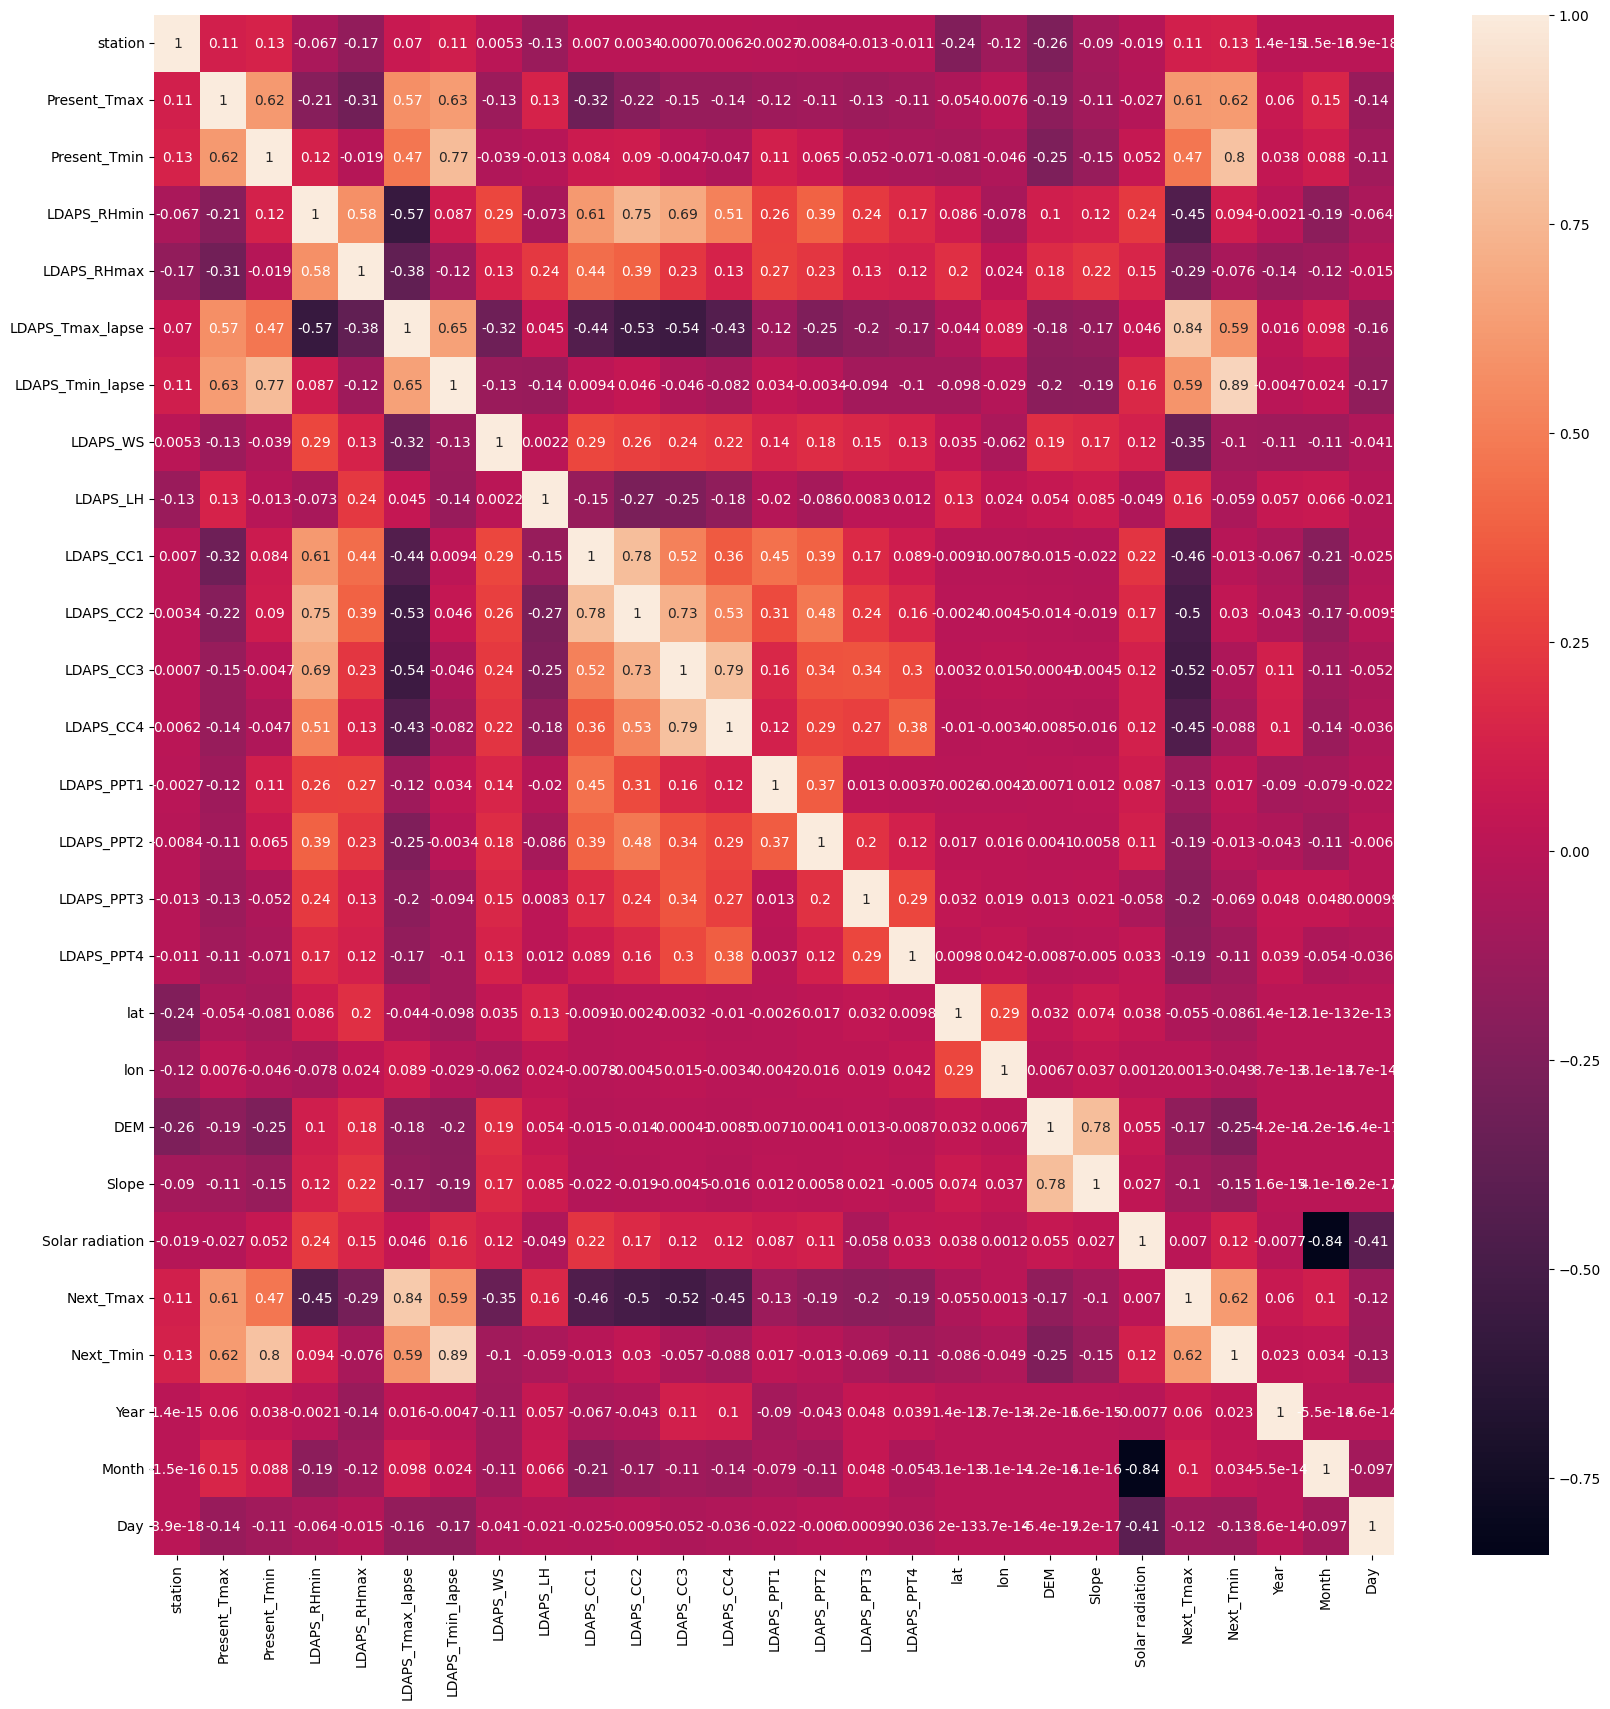

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
trainx = train['Present_Tmin']
# testx = test['Present_Tmin']

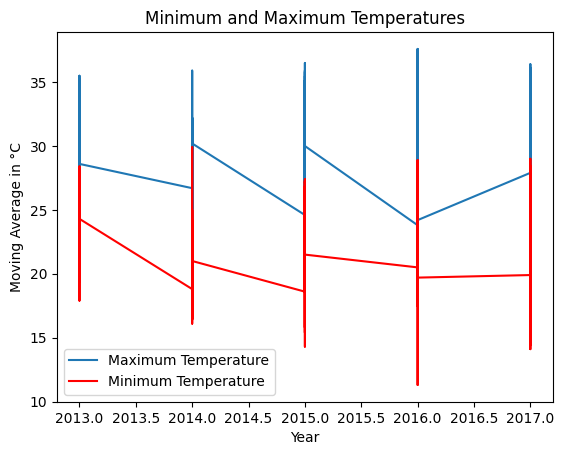

In [ ]:
plt.plot(df.Year, df.Present_Tmax, label="Maximum Temperature")
plt.plot(df.Year, df.Present_Tmin, label="Minimum Temperature", color="red")
plt.legend()
plt.title( 'Minimum and Maximum Temperatures')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()

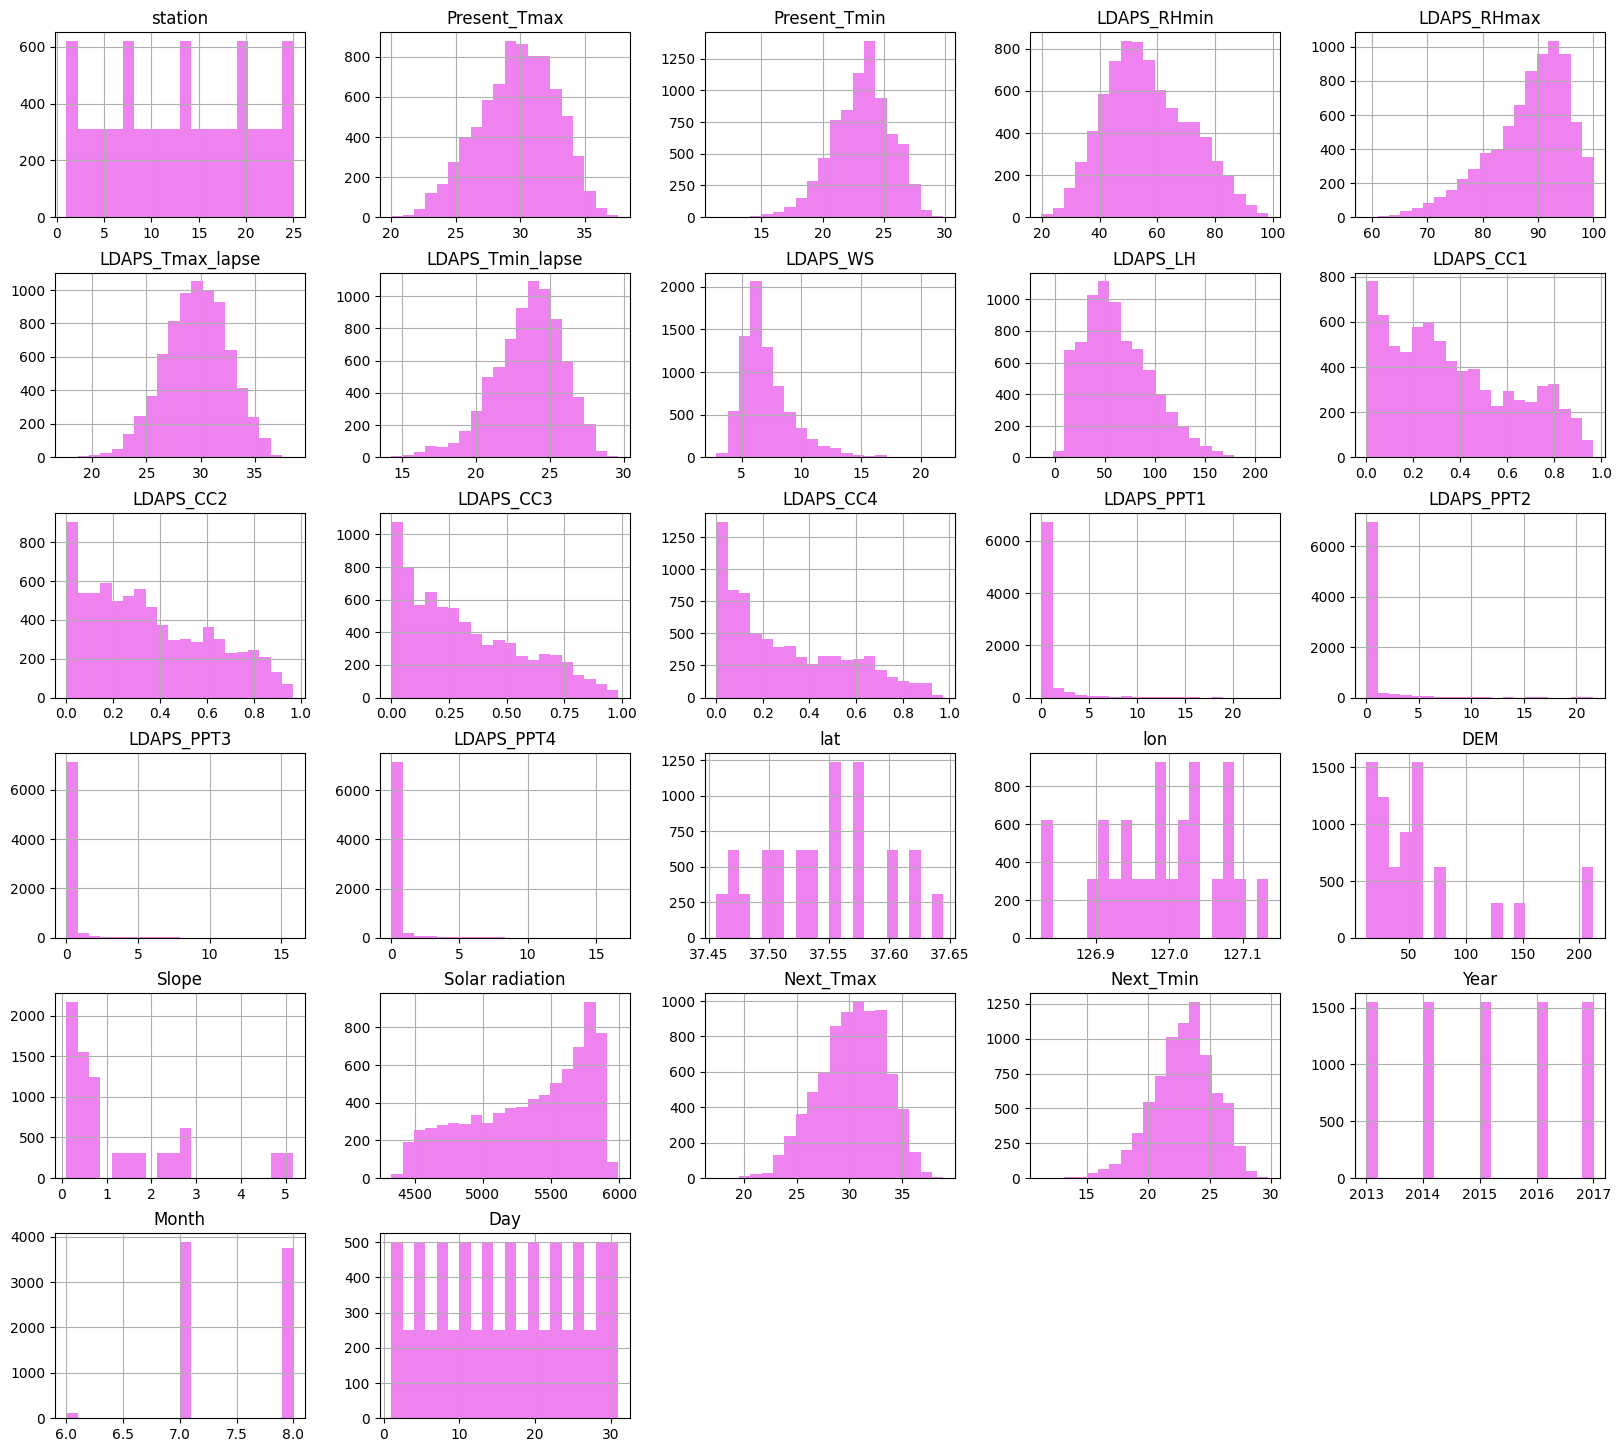

In [ ]:
df.hist(bins = 20, figsize = (20, 18), color = 'violet');

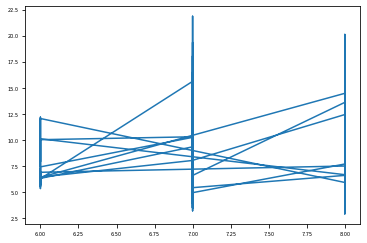

In [ ]:
plt.plot(df.Month,df.LDAPS_WS)

In [ ]:
trainx = pd.DataFrame(trainx)
# testx = pd.DataFrame(testx)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(trainx)
train_scaled = scaler.transform(trainx)
# test_scaled  = scaler.transform(testx)

In [ ]:
# N_train = train_scaled.values
N_trainx = train_scaled.astype('float32')

In [ ]:
trainx.head()

,Present_Tmin
Date,
2013-06-30,22.0
2013-07-01,21.7
2013-07-02,22.1
2013-07-03,19.5
2013-07-04,23.5


In [ ]:
timestep = 24

X= []
Y=[]


for i in range(len(N_trainx)- (timestep)):
    X.append(N_trainx[i:i+timestep])
    Y.append(N_trainx[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 150
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

(150, 24, 1)
(74, 24, 1)


In [ ]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM, Dense, Bidirectional

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='tanh', input_shape=(24,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))


model.add(LSTM(64,activation = 'tanh', input_shape= (24,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(8, activation='tanh', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [ ]:
model.summary()
history = model.fit(Xtrain,Ytrain,epochs=110, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 23, 256)           768       
                                                                 
 conv1d_7 (Conv1D)           (None, 22, 128)           65664     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1408)              0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 30, 1408)         0         
 or)                                                             
                                                                 
 lstm_12 (LSTM)              (None, 30, 64)           

Text(0.5, 1.0, 'Model Accuracy')

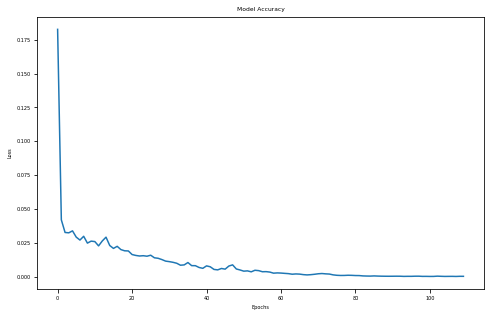

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

ans = mean_squared_error(Ytest,preds)

In [ ]:
# train_score = np.sqrt(mean_squared_error(Ytest, X_train))
test_score = np.sqrt(ans)

# print('LSTM Train Score: %.2f RMSE' % (train_score))
print('LSTM Test Score: %.2f RMSE' % (test_score))

LSTM Test Score: 2.08 RMSE


In [ ]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.46210578728139606

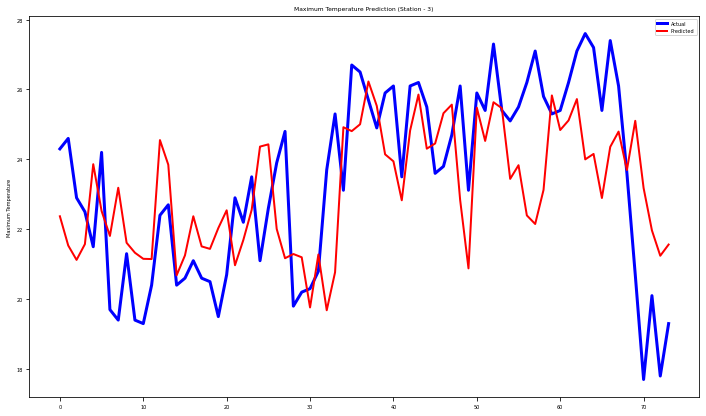

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(Ytest , 'blue', linewidth=3)
plt.plot(preds,'r' , linewidth=2)
plt.legend(('Actual','Predicted'))
plt.title("Maximum Temperature Prediction (Station - 3)")
plt.ylabel('Maximum Temperature')
plt.show()

In [ ]:
test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])

In [ ]:
test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])
results = pd.concat([test,pred],axis=1)
results.head(20)

,Actual,Predict
0,24.699999,21.782413
1,24.500000,22.902552
2,22.799999,24.842268
3,23.100000,24.249588
4,22.200001,23.808298
5,23.799999,23.063175
6,19.600000,23.579903
7,19.000000,22.569967
8,21.200001,21.705547
9,20.200001,21.531666


# Model Deviation from actual value (Bias)

In [ ]:
(pred['Predict'] - test['Actual']).mean()

-0.1831849

In [ ]:
def insert_end(Xin,new_input):
    #print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    #print ('After :\n', Xin)
    return Xin

In [ ]:
from datetime import timedelta
future = 30
forcast = []
Xin = Xtest[-1:,:,:]
time=[]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast.append(out[0,0]) 
    print(forcast)
    Xin = insert_end(Xin,out[0,0]) 
    time.append(pd.to_datetime(df.index[-1])+timedelta(days=i+1))

[0.26489303]
[0.26489303, 0.28595403]
[0.26489303, 0.28595403, 0.34053913]
[0.26489303, 0.28595403, 0.34053913, 0.34766364]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102, 0.18487868]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102, 0.18487868, 0.22233872]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102, 0.18487868, 0.22233872, 0.36224088]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102, 0.18487868, 0.22233872, 0.36224088, 0.41973308]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.266513, 0.29396102, 0.18487868, 0.22233872, 0.36224088, 0.41973308, 0.5533751]
[0.26489303, 0.28595403, 0.34053913, 0.34766364, 0.26624355, 0.2665

In [ ]:
forcasted_output=np.asanyarray(forcast)   
forcasted_output=forcasted_output.reshape(-1,1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [ ]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output],axis=1)
df_result.columns = "Date","Forecasted"

In [ ]:
(df_result)

,Date,Forecasted
0,2017-08-31,20.534355
1,2017-09-01,20.759708
2,2017-09-02,21.343769
3,2017-09-03,21.420000
4,2017-09-04,20.548805
5,2017-09-05,20.551689
6,2017-09-06,20.845383
7,2017-09-07,19.678202
8,2017-09-08,20.079025
9,2017-09-09,21.575979


In [ ]:
for i in range(1,len(station)):
    
    plt.rcParams.update({'font.size': 5})
    ncols = 2
    nrows = 2
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Next Max temp at station {}'.format(i))
    years = [2013,2014,2015,2016]
    
    for ax, j in zip(axes.flatten(), years):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Year {}'.format(j))
    
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)   

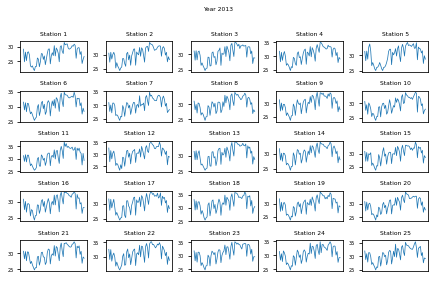

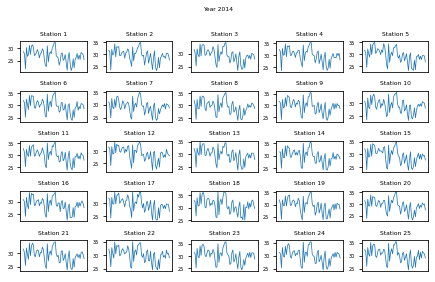

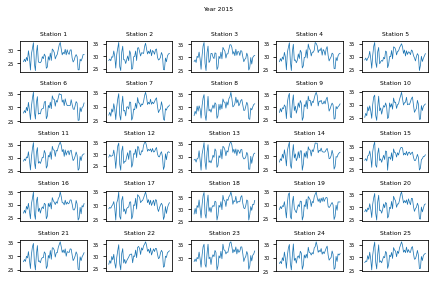

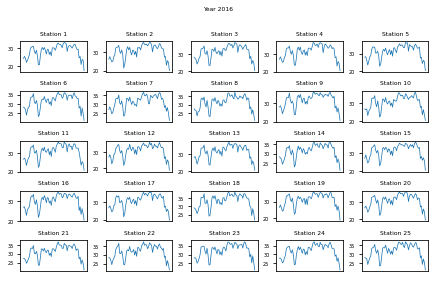

In [ ]:
years = [2013,2014,2015,2016]
for j in years:
    
    #plt.rcParams.update({'font.size:5'})
    ncols = 5
    nrows = 5
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Year {}'.format(j))
    i = range(1,26)
    
    for ax, i in zip(axes.flatten(), i):
        ax.plot(station[i].loc[station[i]['Year']==j]['Next_Tmax'], linewidth=0.75)
        ax.title.set_text('Station {}'.format(i))
        
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis='y', labelsize=5)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

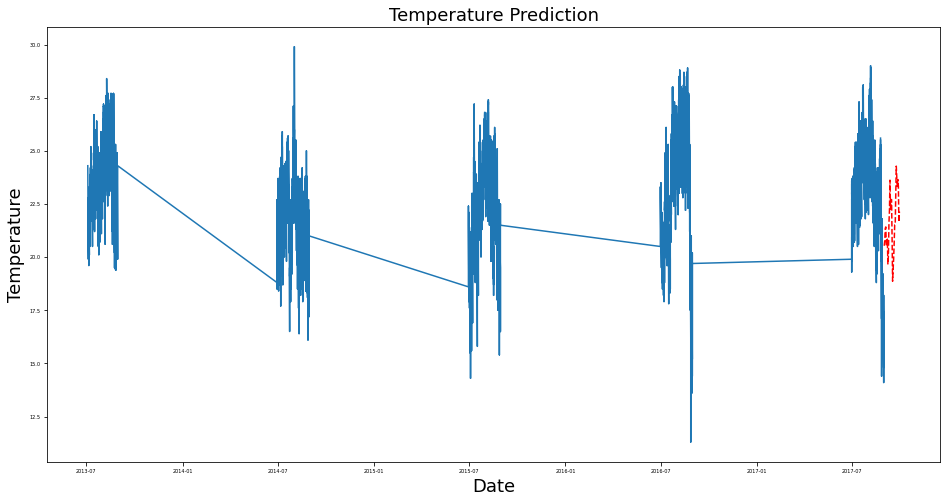

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Temperature Prediction',fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature' ,fontsize=18)
plt.plot(df['Present_Tmin'][124:])
plt.plot(df_result.set_index('Date')[['Forecasted']],"r--")

# Mapping

In [ ]:
new_data = pd.DataFrame(columns=['lat','lon'], index=range(0,25))
for i in range(0,25):
    new_data['lat'][i] = data_df['lat'][i]
    new_data['lon'][i] = data_df['lon'][i]

In [ ]:
x = []
for i in range(1,26):
    x.append(i)
x = pd.DataFrame(x)

In [ ]:
new_data['station'] = x

In [ ]:
new_data

,lat,lon,station
0,37.6046,126.991,1
1,37.6046,127.032,2
2,37.5776,127.058,3
3,37.645,127.022,4
4,37.5507,127.135,5
5,37.5102,127.042,6
6,37.5776,126.838,7
7,37.4697,126.91,8
8,37.4967,126.826,9
9,37.4562,126.955,10


# Map

In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium

In [ ]:
map = folium.Map(location=[new_data.lat.mean(), new_data.lon.mean()], zoom_start=14, control_scale=True)

In [ ]:
for index, location_info in new_data.iterrows():
    folium.Marker([location_info["lat"], location_info["lon"]],popup=location_info["station"]).add_to(map)

In [ ]:
map

In [ ]:
for i in range(1, 26):
    targets  = ['Next_Tmax','Next_Tmin']
    features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
                'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
                'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

    #let's predict the Next_Tmax and Next_Tmin for 2017 at station-1 
    train = station[1].loc[station[1]['Year']!=2017]  
    test = station[1].loc[station[1]['Year']==2017]

    train = train.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    test = test.drop(['station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)